In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pqcd

from scipy.constants import hbar, c, e
from cmcrameri import cm
from pqcd.utils import nsat, rcparams
plt.rcParams.update(rcparams)

In [2]:
X = 1
pQCDX = pqcd.pQCD(X)

In [3]:
mu = np.linspace(2.4, 100, num=50)

n = []
p = []
epsilon = []
cs2 = []

for muH in mu:
    nH, pH, cs2H = pQCDX.nH(muH), pQCDX.pH(muH), pQCDX.cs2H(muH)
    n.append(nH)
    p.append(pH)
    cs2.append(cs2H)
    epsilon.append(pqcd.epsilon_func(muH, nH, pH))

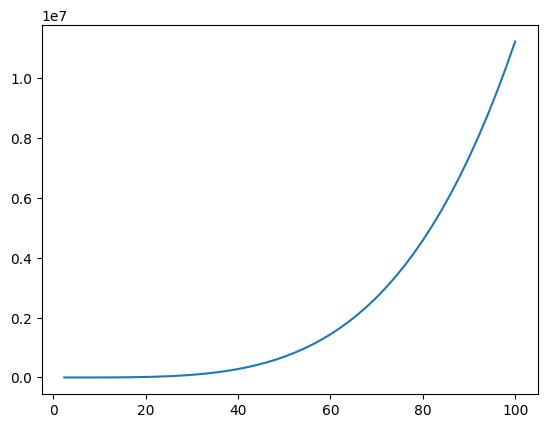

In [4]:
fig, ax = plt.subplots()
ax.plot(mu, p);

In [5]:
cs2_grad = np.gradient(p, epsilon)

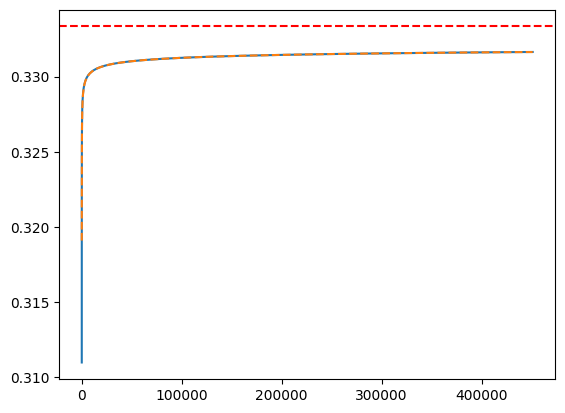

In [6]:
fig, ax = plt.subplots()
ax.plot(n, cs2)
ax.plot(n, cs2_grad, ls='--')
ax.axhline(1/3, color='r', linestyle='--');

In [7]:
def a_func(X):
    d1 = 0.5034
    eta1 = 0.3553
    return d1*X**(-eta1)

def b_func(X):
    d2 = 1.452
    eta2 = 0.9101
    return d2*X**(-eta2)

def P_SB(mu):
    return (3/(4*np.pi**2))*(mu/3)**4

def P_QCD(mu, X):
    # I beleive mu has to be in units of GeV, and this pressure is in GeV^4
    c1 = 0.9008
    return P_SB(mu)*(c1 - (a_func(X)/(mu - b_func(X))))

In [8]:
# kg m**3 s**-2 = J m
hbar*c

3.1615267734966903e-26

In [9]:
# eV m
hbar*c/e

1.973269804593025e-07

In [10]:
# GeV fm
(hbar*c/e) / 10**9 * 1e15

0.1973269804593025

In [11]:
# To convert from GeV^4 to GeV/fm^3 I multiply by
conversion = 1/(((hbar*c/e) / 10**9 * 1e15)**3)
conversion

130.1489261716633

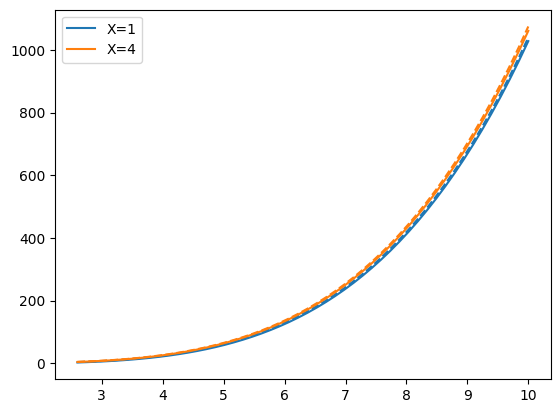

In [12]:
X_vals = [1, 4]
mu_vals = np.linspace(2.6, 10, num=50)

fig, ax = plt.subplots()
for i, X in enumerate(X_vals):
    pQCDX = pqcd.pQCD(X)
    p_fraga = []
    p_komoltsev = []
    for mu in mu_vals:
        p_fraga.append(P_QCD(mu, X)*conversion)
        p_komoltsev.append(pQCDX.pH(mu))
    c = f'C{i}'
    ax.plot(mu_vals, p_fraga, c=c, label=f'X={X}')
    ax.plot(mu_vals, p_komoltsev, c=c, ls='--')

ax.legend();

/Users/eliot/Documents/Research/EOS/pqcd/pqcd/pqcd.py:77: RuntimeWarning: invalid value encountered in log
  numerator = 4*np.pi*(1. - (64.*np.log(np.log(0.777632*mu**2*X**2))) /


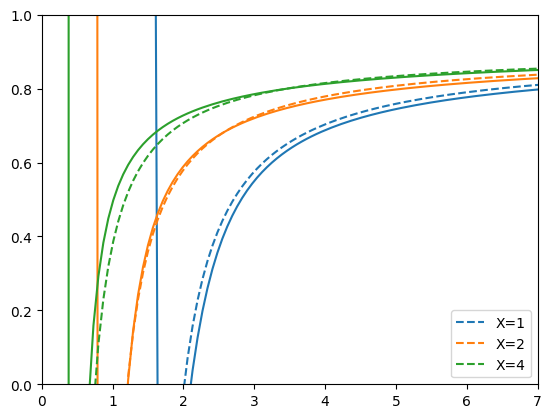

In [13]:
X_vals = [1, 2, 4]
mu_vals = np.linspace(0.1, 70, num=1000)

fig, ax = plt.subplots()
for i, X in enumerate(X_vals):
    pQCDX = pqcd.pQCD(X/2)
    p_fraga = []
    p_komoltsev = []
    for mu in mu_vals:
        p_fraga.append(P_QCD(mu, X)/P_SB(mu))
        p_komoltsev.append(pQCDX.pH(mu)/(conversion*P_SB(mu)))
    p_fraga = np.array(p_fraga)
    p_komoltsev = np.array(p_komoltsev)
    c = f'C{i}'
    ax.plot(mu_vals[np.argmin(p_fraga**2):], p_fraga[np.argmin(p_fraga**2):], c=c, ls='--', label=f'X={X}')
    ax.plot(mu_vals[np.argmin(p_komoltsev**2):], p_komoltsev[np.argmin(p_komoltsev**2):], c=c)

ax.set_xlim(0, 7)
ax.set_ylim(0, 1)
ax.legend();

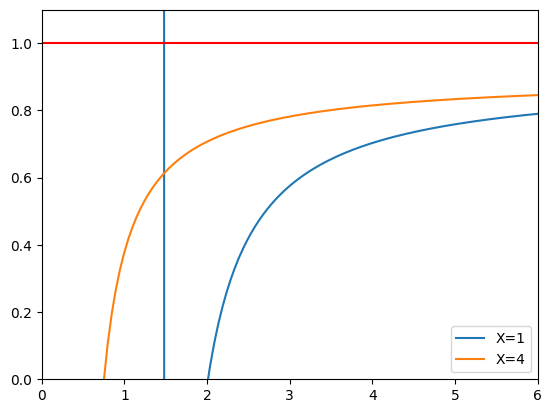

In [14]:
X_vals = [1, 4]
mu_vals = np.linspace(0.5, 50, num=1000)

fig, ax = plt.subplots()
for i, X in enumerate(X_vals):
    p_fraga = []
    for mu in mu_vals:
        p_fraga.append(P_QCD(mu, X)/P_SB(mu))
    c = f'C{i}'
    ax.plot(mu_vals, p_fraga, c=c, label=f'X={X}')

ax.axhline(1, c='red')

ax.set_xlim(0, 6)
ax.set_ylim(0, 1.1)
ax.legend();

In [65]:
soft_eos = pd.read_csv('../data/soft_eos.csv')

soft_number_density = soft_eos['n/n0'].values
chiEFT_mask = soft_number_density <= 1.1

soft_number_density = soft_number_density[chiEFT_mask]*nsat
soft_pressure = soft_eos['p'].values[chiEFT_mask]/1000
soft_energy_density = soft_eos['epsilon'].values[chiEFT_mask]/1000

soft_chemical_potential = (
    soft_energy_density+soft_pressure
    )/soft_number_density

soft_speed_of_sound_squared = np.gradient(
    soft_pressure, soft_energy_density
)

In [66]:
stiff_eos = pd.read_csv('../data/stiff_eos.csv')

stiff_number_density = stiff_eos['n/n0'].values
chiEFT_mask = stiff_number_density <= 1.1

stiff_number_density = stiff_number_density[chiEFT_mask]*nsat
stiff_pressure = stiff_eos['p'].values[chiEFT_mask]/1000
stiff_energy_density = stiff_eos['epsilon'].values[chiEFT_mask]/1000

stiff_chemical_potential = (
    stiff_energy_density+stiff_pressure
    )/stiff_number_density

stiff_speed_of_sound_squared = np.gradient(
    stiff_pressure, stiff_energy_density
)

In [67]:
mean_pressure = np.mean([soft_pressure, stiff_pressure], axis=0)

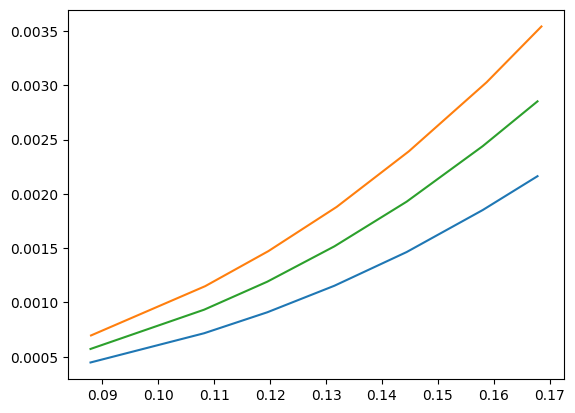

In [69]:
fig, ax = plt.subplots()

ax.plot(soft_energy_density, soft_pressure)
ax.plot(stiff_energy_density, stiff_pressure)
ax.plot(soft_energy_density, mean_pressure)

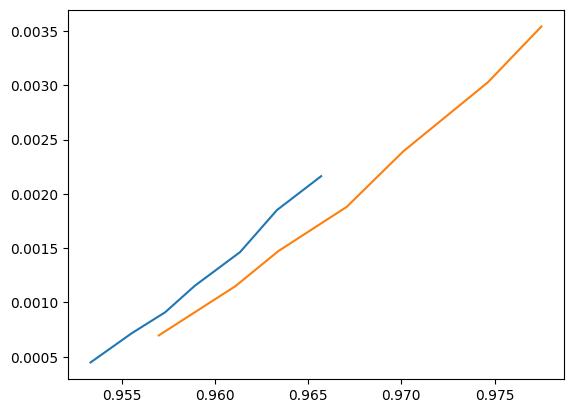

In [71]:
fig, ax = plt.subplots()

ax.plot(soft_chemical_potential, soft_pressure)
ax.plot(stiff_chemical_potential, stiff_pressure)
# ax.plot(soft_chemical_potential, mean_pressure)

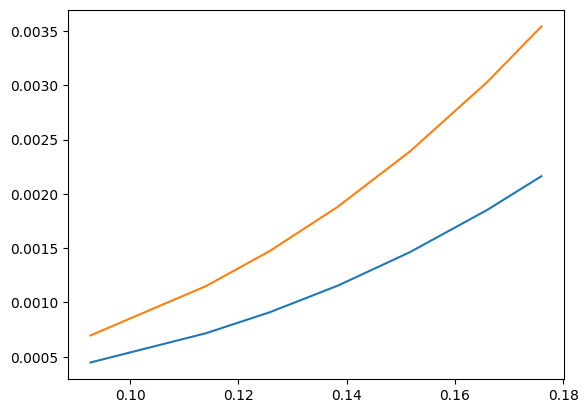

In [72]:
fig, ax = plt.subplots()

ax.plot(soft_number_density, soft_pressure)
ax.plot(stiff_number_density, stiff_pressure)
# ax.plot(soft_chemical_potential, mean_pressure)

In [85]:
# Relative uncertainty at 1.1nsat = 0.176/fm^3
target_uncertainty = np.abs(stiff_pressure[-1] - soft_pressure[-1])/mean_pressure[-1]
target_uncertainty

0.4834355828220859

In [98]:
mu_vals = np.linspace(2.2, 4.2, num=100)

uncertainties = []
for mu in mu_vals:

    # X = 1/2
    pQCDX = pqcd.pQCD(1/2)
    p1 = pQCDX.pH(mu)

    # X = 1
    pQCDX = pqcd.pQCD(1)
    p2 = pQCDX.pH(mu)

    # X = 2
    pQCDX = pqcd.pQCD(2)
    p3 = pQCDX.pH(mu)

    uncertainties.append(np.abs(p1 - p3)/p2)

In [99]:
# Functions in the pQCD code assume X is fixed as a function of mu
X_list = np.linspace(0.5, 2, num=31)
X_list_highlight = [0.5, 1.0, 2.0]

p_dict = {X: [] for X in X_list}
n_dict = {X: [] for X in X_list}
cs2_dict = {X: [] for X in X_list}
epsilon_dict = {X: [] for X in X_list}

for X in X_list:
    pQCDX = pqcd.pQCD(X)
    for mu in mu_vals:
        p_dict[X].append(pQCDX.pH(mu))
        n_dict[X].append(pQCDX.nH(mu))
        cs2_dict[X].append(pQCDX.cs2H(mu))
        epsilon_dict[X].append(pQCDX.epsilonH(mu))

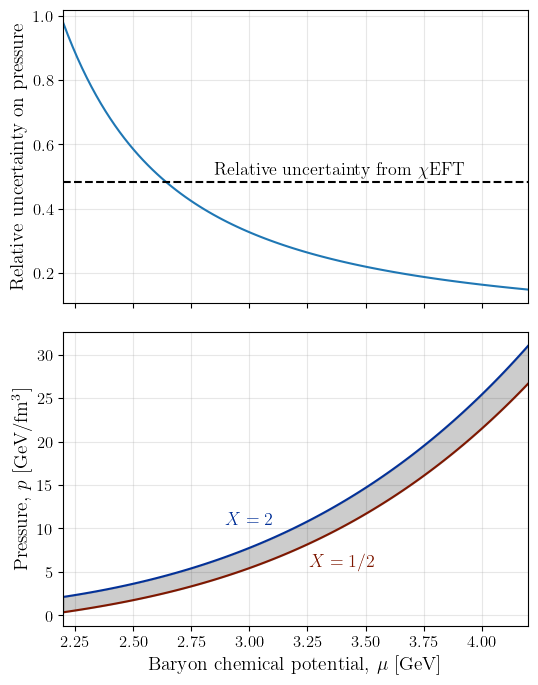

In [132]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6, 8))
fig.subplots_adjust(hspace=0.1)
for ax in axs:
    ax.set_axisbelow(True)
    ax.grid(alpha=0.3)

axs[0].plot(mu_vals, uncertainties)
axs[0].axhline(target_uncertainty, c='k', ls='--')

axs[0].text(
    2.85,
    target_uncertainty+0.01,
    'Relative uncertainty from $\chi$EFT',
    fontsize=13, 
    ha='left',
    va='bottom',
)

axs[1].fill_between(
    mu_vals,
    p_dict[0.5],
    p_dict[2],
    color='k',
    alpha=0.2
)

colors = [cm.roma(0.), cm.roma(1.)]
for i, X in enumerate([0.5, 2]):
    axs[1].plot(mu_vals, p_dict[X], c=colors[i])

axs[1].text(
    3.4,
    5, 
    '$X = 1/2$', 
    fontsize=13, 
    ha='center',
    va='bottom',
    c=cm.roma(0.)
)

axs[1].text(
    3, 
    10, 
    '$X = 2$', 
    fontsize=13, 
    ha='center',
    va='bottom',
    c=cm.roma(1.)
)

axs[0].set_xlim(mu_vals[0], mu_vals[-1])

axs[1].set_xlabel('Baryon chemical potential, $\mu$ [GeV]')
axs[0].set_ylabel('Relative uncertainty on pressure')
axs[1].set_ylabel('Pressure, $p$ [GeV/fm$^3$]')

fig.savefig('figures/paper/pqcd_uncertainty.pdf', bbox_inches='tight')

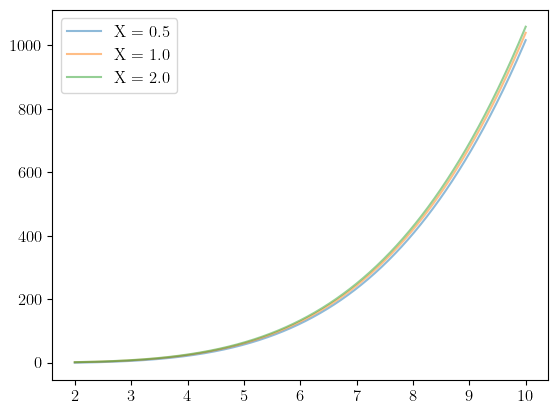

In [89]:
fig, ax = plt.subplots()

for i, X in enumerate(X_list_highlight):
    c = f'C{i}'
    ax.plot(mu_vals, p_dict[X], c=c, label=f'X = {X}', alpha=0.5)

ax.legend();

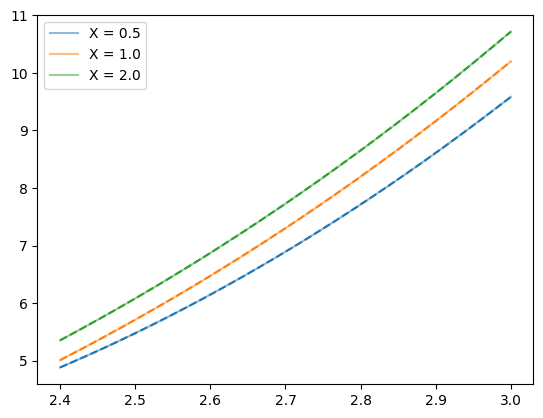

In [25]:
fig, ax = plt.subplots()

for i, X in enumerate(X_list_highlight):
    c = f'C{i}'
    ax.plot(mu_vals, n_dict[X], c=c, label=f'X = {X}', alpha=0.5)
    n_derived = np.gradient(p_dict[X], mu_vals)
    ax.plot(mu_vals, n_derived, c=c, ls='--')

ax.legend();

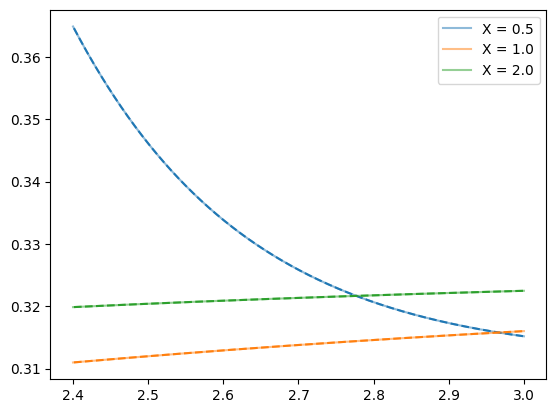

In [26]:
fig, ax = plt.subplots()

for i, X in enumerate(X_list_highlight):
    c = f'C{i}'
    ax.plot(mu_vals, cs2_dict[X], c=c, label=f'X = {X}', alpha=0.5)
    n_derived = np.gradient(p_dict[X], mu_vals)
    epsilon_derived = -np.array(p_dict[X]) + mu_vals*n_derived
    cs2_derived = np.gradient(p_dict[X], epsilon_derived)
    ax.plot(mu_vals[2:-2], cs2_derived[2:-2], c=c, ls='--')

ax.legend();

In [27]:
# What if we fix Lambda and then take the derivative wrt mu? We should do
# this analytically...

In [28]:
# But presumably the true EOS might not have a fixed X across different values 
# of mu?

X_vals = np.linspace(0.7, 1, num=1000)

p_Xvary = []
n_Xvary = []
cs2_Xvary = []
epsilon_Xvary = []

for mu, X in zip(mu_vals, X_vals):
    pQCDX = pqcd.pQCD(X)
    p_Xvary.append(pQCDX.pH(mu))
    n_Xvary.append(pQCDX.nH(mu))
    cs2_Xvary.append(pQCDX.cs2H(mu))
    epsilon_Xvary.append(pQCDX.epsilonH(mu))

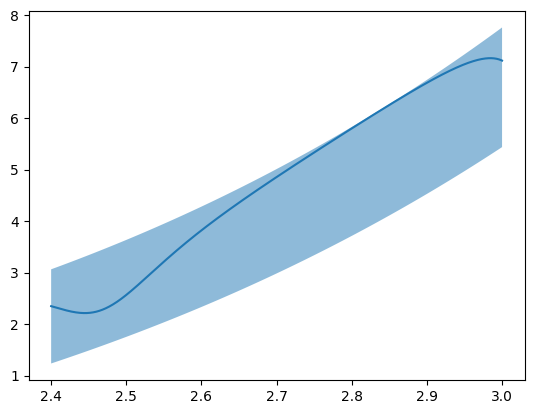

In [47]:
fig, ax = plt.subplots()
ax.fill_between(mu_vals, p_dict[0.5], p_dict[2], alpha=0.5)
ax.plot(mu_vals, p_Xvary);

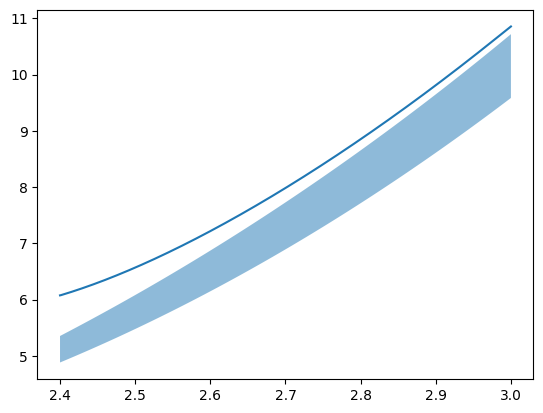

In [30]:
fig, ax = plt.subplots()
ax.fill_between(mu_vals, n_dict[0.5], n_dict[2], alpha=0.5)
ax.plot(mu_vals, np.gradient(p_Xvary, mu_vals));

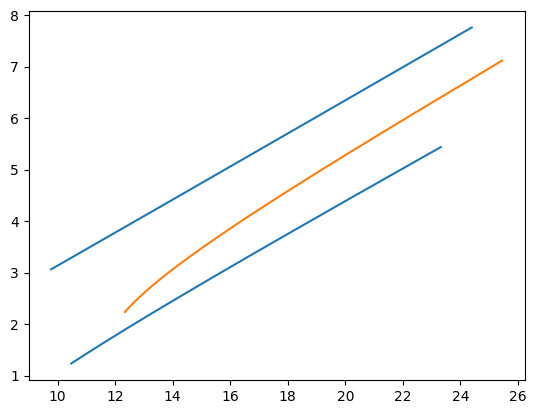

In [31]:
fig, ax = plt.subplots()
ax.plot(epsilon_dict[0.5], p_dict[0.5], c='C0')
ax.plot(epsilon_dict[2], p_dict[2], c='C0')
n = np.gradient(p_Xvary, mu_vals)
epsilon = -np.array(p_Xvary) + mu_vals*n
ax.plot(
    epsilon,
    p_Xvary, 
    c='C1'
);

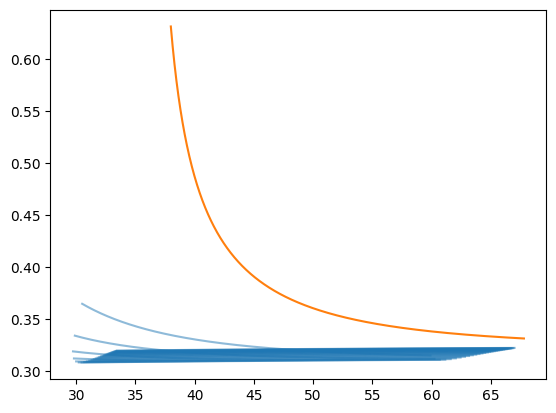

In [32]:
fig, ax = plt.subplots()
for i, X in enumerate(X_list):
    ax.plot(np.array(n_dict[X])/nsat, cs2_dict[X], c='C0', alpha=0.5)
ax.plot(n[2:-2]/nsat, np.gradient(p_Xvary, epsilon)[2:-2], c='C1');

In [33]:
from scipy.interpolate import CubicSpline

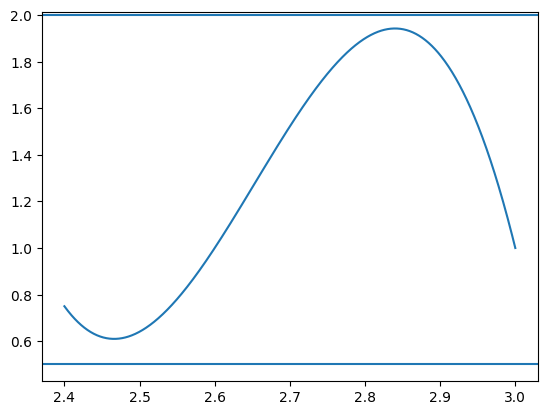

In [34]:
X_vals = [0.75, 1, 1.9, 1]
mu_Xvals = [2.4, 2.6, 2.8, 3]

X_vals = CubicSpline(mu_Xvals, X_vals)(mu_vals)

fig, ax = plt.subplots()

ax.plot(mu_vals, X_vals)
ax.axhline(0.5)
ax.axhline(2);

In [35]:
p_Xvary = []
n_Xvary = []
cs2_Xvary = []
epsilon_Xvary = []

for mu, X in zip(mu_vals, X_vals):
    pQCDX = pqcd.pQCD(X)
    p_Xvary.append(pQCDX.pH(mu))
    n_Xvary.append(pQCDX.nH(mu))
    cs2_Xvary.append(pQCDX.cs2H(mu))
    epsilon_Xvary.append(pQCDX.epsilonH(mu))

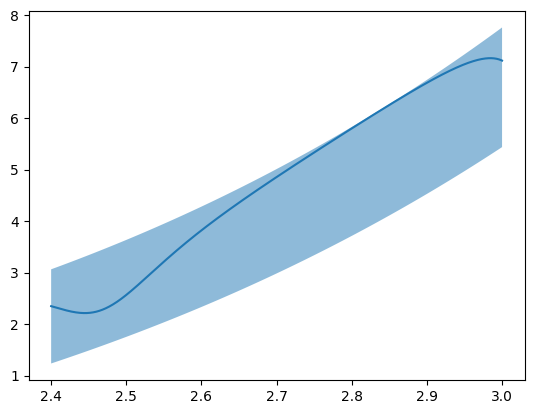

In [36]:
fig, ax = plt.subplots()
ax.fill_between(mu_vals, p_dict[0.5], p_dict[2], alpha=0.5)
ax.plot(mu_vals, p_Xvary);

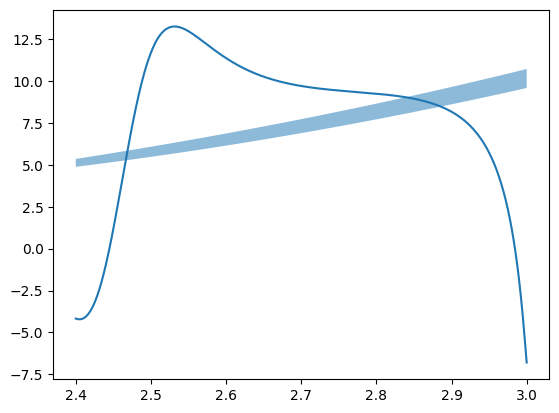

In [37]:
fig, ax = plt.subplots()
ax.fill_between(mu_vals, n_dict[0.5], n_dict[2], alpha=0.5)
ax.plot(mu_vals, np.gradient(p_Xvary, mu_vals));

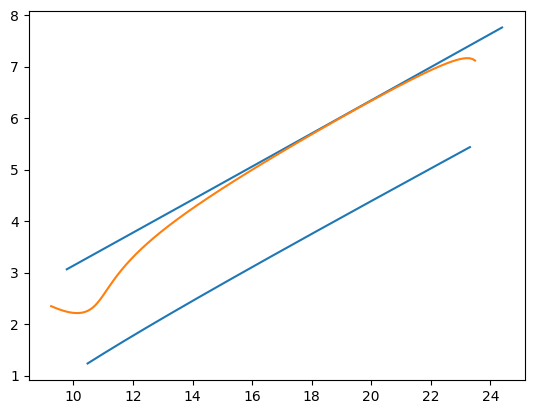

In [38]:
fig, ax = plt.subplots()
ax.plot(epsilon_dict[0.5], p_dict[0.5], c='C0')
ax.plot(epsilon_dict[2], p_dict[2], c='C0')
ax.plot(epsilon_Xvary, p_Xvary, c='C1');

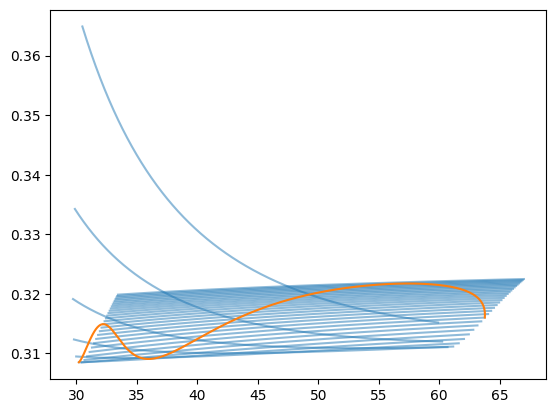

In [39]:
fig, ax = plt.subplots()
for i, X in enumerate(X_list):
    ax.plot(np.array(n_dict[X])/nsat, cs2_dict[X], c='C0', alpha=0.5)
ax.plot(np.array(n_Xvary)/nsat, cs2_Xvary, c='C1');

In [40]:
X = 1
mu_vals = np.logspace(2.2, 100, num=1000)
Lambda_vals = (2/3)*X*mu_vals

(0.0, 0.12105828929079458)

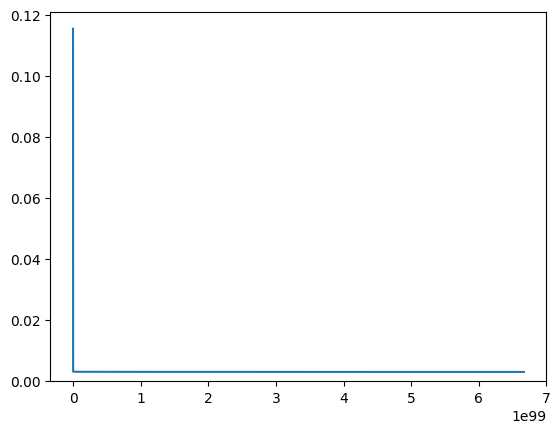

In [41]:
fig, ax = plt.subplots()

ax.plot(Lambda_vals, pqcd.pqcd.alpha_s(mu_vals, X))

ax.set_ylim(0)

In [42]:
GeV3_to_fm3 = 1.0e3/1.9732705**3

def PNLO(a_s):
    # Eqs. 12 and 13 of https://arxiv.org/abs/2303.02175.
    # 1 - (2/pi).
    return 1. - 0.637*a_s


def PNNLO(a_s, mu, Lambda):
    # I think Eqs. 15 and 16 of https://arxiv.org/abs/2303.02175, but I haven't
    # checked
    return -a_s**2*(-1.831 + 0.304*np.log(a_s)) + \
        a_s**2*(-2.706 - 0.912*np.log(1.5*Lambda/mu))


def PN3LO(a_s):
    # Eq. 17 of https://arxiv.org/abs/2303.02175 (also haven't checked)
    return 0.484816*a_s**3


def alpha_s(Lambda):
    # Eq. 9 in http://arxiv.org/abs/0912.1856. Note that
    # ((1/3)**2)/(0.378**2) = 0.777632, where 0.378 is the value used for
    # Lambda_MS (see page 8 in http://arxiv.org/abs/0912.1856).
    numerator = 4*np.pi*(1. - (64.*np.log(np.log(0.777632*(1.5*Lambda)**2))) /
                         (81.*np.log(0.777632*(1.5*Lambda)**2)))
    denominator = (9.*np.log(0.777632*(1.5*Lambda)**2))
    return numerator/denominator


def pFD(mu):
    return (mu)**4/(108*np.pi**2)


def pH(mu, Lambda):  # GeV/fm^3
    a_s = alpha_s(Lambda)
    return pFD(mu)*GeV3_to_fm3*(
        PNLO(a_s) + PNNLO(a_s, mu, Lambda) + PN3LO(a_s)
    )
    

In [59]:
mu_vals = np.linspace(2.6, 3, num=1000)

Lambda_central_vals = 2*mu_vals/3
n_central = []

for i, Lambda in enumerate(Lambda_central_vals):
    p = []
    for mu in mu_vals:
        p.append(pH(mu, Lambda))
    n = np.gradient(p, mu_vals)
    n_central.append(n[i])

Lambda_lower_vals = mu_vals/3
n_lower = []

for i, Lambda in enumerate(Lambda_lower_vals):
    p = []
    for mu in mu_vals:
        p.append(pH(mu, Lambda))
    n = np.gradient(p, mu_vals)
    n_lower.append(n[i])

Lambda_upper_vals = 4*mu_vals/3
n_upper = []

for i, Lambda in enumerate(Lambda_upper_vals):
    p = []
    for mu in mu_vals:
        p.append(pH(mu, Lambda))
    n = np.gradient(p, mu_vals)
    n_upper.append(n[i])

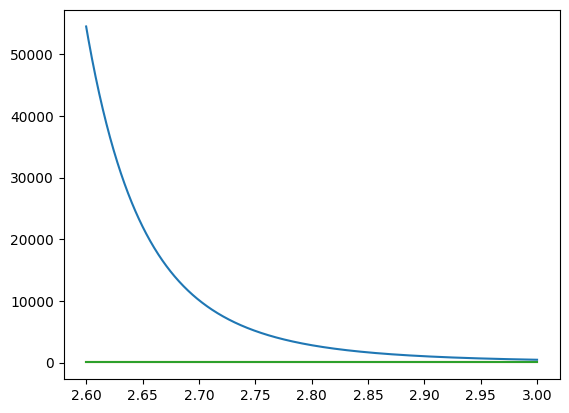

In [60]:
fig, ax = plt.subplots()
ax.fill_between(mu_vals, n_dict[0.5], n_dict[2], alpha=0.5)

ax.plot(mu_vals, n_lower)
ax.plot(mu_vals, n_central)
ax.plot(mu_vals, n_upper)

In [58]:
n_lower

[25812006.610225685,
 25020624.921865463,
 24266050.742908478,
 23537512.42063141,
 22834000.28549385,
 22154548.085107803,
 21498230.935985565,
 20864163.380411148,
 20251497.542526245,
 19659421.3781929,
 19087157.013608932,
 18533959.16759491,
 17999113.653182983,
 17481935.95414543,
 16981769.872351646,
 16497986.242260933,
 16029981.708873749,
 15577177.565781593,
 15139018.650107384,
 14714972.291386604,
 14304527.311455727,
 13907193.07273388,
 13522498.57237053,
 13149991.579842567,
 12789237.81576538,
 12439820.16979599,
 12101337.955596924,
 11773406.200984955,
 11455654.971475601,
 11147728.725494385,
 10849285.699673653,
 10559997.322721481,
 10279547.656442642,
 10007632.862495422,
 9743960.693668365,
 9488250.008428574,
 9240230.307600975,
 8999641.29206562,
 8766232.44047165,
 8539762.605994701,
 8319999.631166458,
 8106719.979929447,
 7899708.386112213,
 7698757.517479897,
 7503667.654634476,
 7314246.384087086,
 7130308.304769039,
 6951674.747391224,
 6778173.506037235